# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


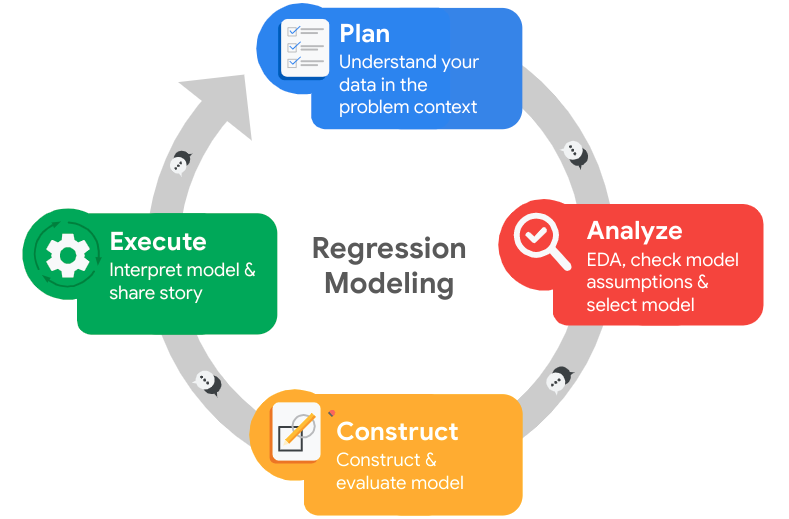

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders for this project are the senior leadership team and Salifort employees.
2. We are trying to discover reasons why an employee leaves the company and build a model that will predict whether an employee will leave and come up with ideas on how to increase employee retention.
3. There are some outliers and duplicates, there are some columns that are categorical, there are no missing values.
4. Course notes, documentation, Google
5. At this point, I don't really have any ethical considerations. If we're trying to find reasons for an employee leaving the company or predicting whether they will leave the company, there aren't really any ethical considerations if the company uses this information to improve itself for the employees. Something I would question is whether the data is representative of all the different types of employees who have left and stayed in the company.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [59]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics #recall, precision, accuracy, f1, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz

## model imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
print("Shape:", df0.shape)
print("Size:", df0.size)

Shape: (14999, 10)
Size: 149990


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.columns = df0.columns.str.lower()
df0.rename(columns = {'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.drop_duplicates().shape

(11991, 10)

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated(keep='first')]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

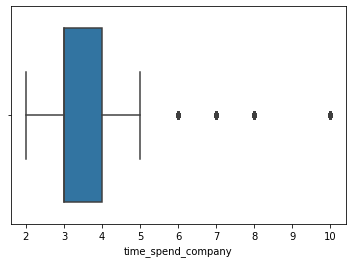

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(
    x = df1['time_spend_company']
)
plt.show()

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25 = df1['time_spend_company'].quantile(0.25)
percentile75 = df1['time_spend_company'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('upper limit', upper_limit, 'lower limit', lower_limit)

mask = ((df1['time_spend_company'] >= lower_limit) & (df1['time_spend_company'] <= upper_limit))
print(df1[mask].shape)


upper limit 5.5 lower limit 1.5
(11167, 10)


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Those who left the company tended to have higher evaluation scores and higher average monthly hours. Satisfaction levels were lower for those who left and spent less time in the company. Those with too little or too many projects had low satisfaction.
2. Distribution of satsifaction level vs. time spent at company was similar to last evaluation score vs. time spent at company. Distributions of salary were mostly low and medium. Average monthly hours and number of project have positive correlation.
3. I didn't transform the data at this stage, but the outliers should be removed because they're not representative data and the categorical variables should be converted to numerical for building the model.
4. Purposes of EDA before constructing a predictive model are to find relationships between variables, look at the data before making any assumptions, identify errors in the data, detect outliers, and understand patterns within the data. 
5. Resources I used includes course notes, Google, documentation, Kaggle.
6. Ethical considerations would be that we should take into account all employee's wellbeing in the company, not just those who we think will leave the company.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
left = df1[df1['left'] == 1].shape[0]
stayed = df1[df1['left'] == 0].shape[0]
total = df1.shape[0]
print('left:', left, 'stayed:', stayed)

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print('left:', (left/total)*100, 'stayed:', (stayed/total)*100)

left: 1991 stayed: 10000
left: 16.604119756484028 stayed: 83.39588024351598


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

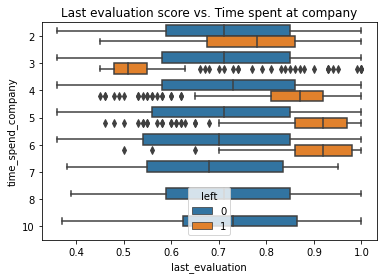

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
plot = sns.boxplot(
    x = df1['last_evaluation'],
    y = df1['time_spend_company'],
    orient = 'h',
    hue = df1['left']
)
plot.set_title('Last evaluation score vs. Time spent at company')

plt.show()

From this plot, we can see that evaluation scores for those who stayed at the company are fairly similar whether the employee had been at the company for 2 years or 10 years. For employees who have left the company, there is more variation in their evaluation scores, but the mean evaluation scores seem to have a tendency to be higher (besides for 3 years at the company).

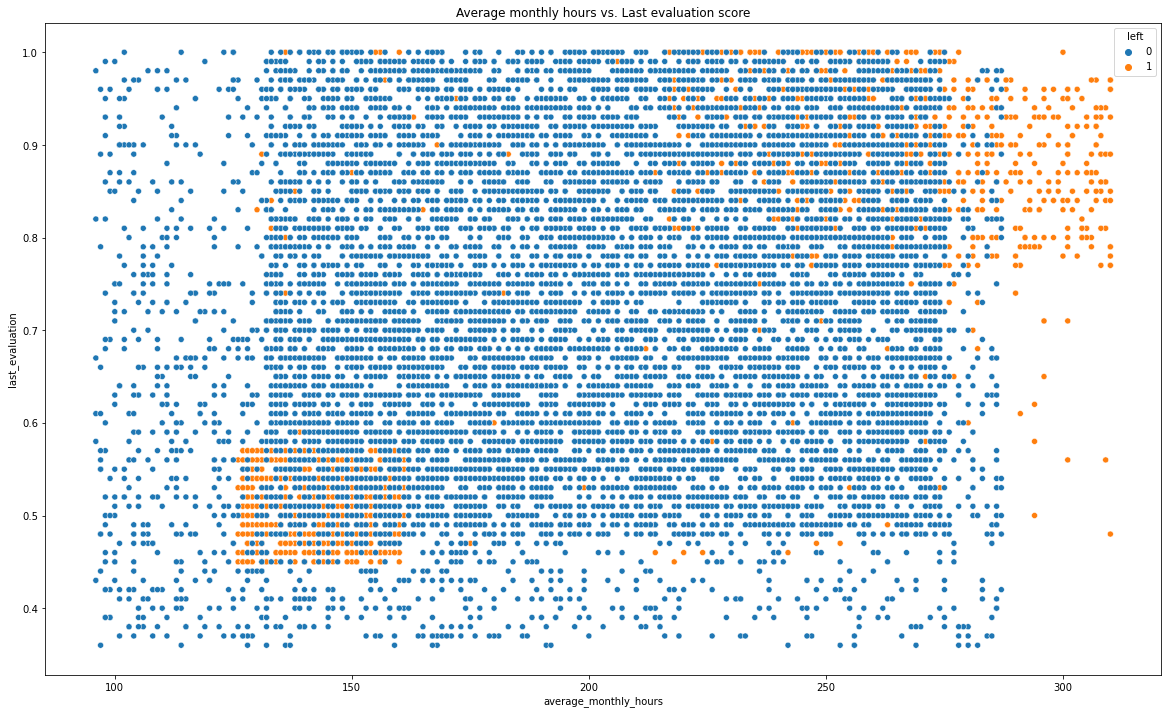

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(20,12))
plot = sns.scatterplot(
    x = df1['average_monthly_hours'],
    y = df1['last_evaluation'],
    hue = df1['left']
)
plot.set_title('Average monthly hours vs. Last evaluation score')

plt.show()

From this, we can see that a majority of the employees that left the company were employees with little monthly hours and lower evaluation scores and employees with the highest amount of monthly hours and high evaluation scores. Most employees seem to be working between 125 and 275 average monthly hours.

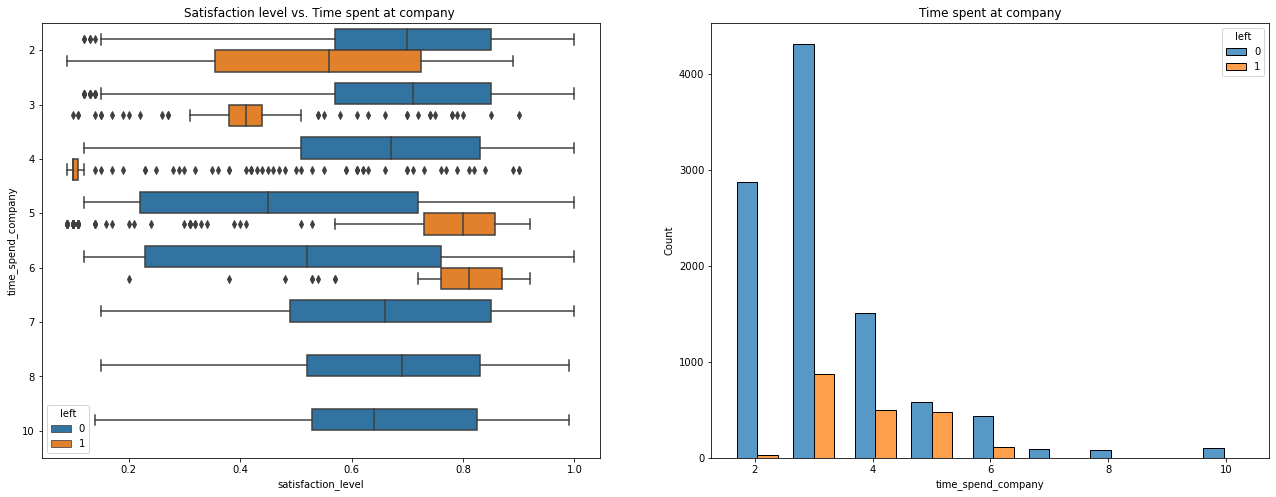

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
sns.boxplot(
    x = df1['satisfaction_level'],
    y = df1['time_spend_company'],
    orient = 'h',
    hue = df1['left'],
    ax = ax[0]
)
ax[0].set_title('Satisfaction level vs. Time spent at company ')

sns.histplot(
    x = df1['time_spend_company'],
    hue = df1['left'],
    multiple = 'dodge',
    shrink = 8,
    ax = ax[1]
)
ax[1].set_title('Time spent at company')

plt.show()

* The distribution of satisfaction level vs. time spent at company is similar to the distribution of last evaluation score vs. time spent at company in certain areas (like year 3 having low values for both). 
* The employees who left seem to be those with low satisfaction and less time spent at the company or those who spent a medium amount of time in the company but have medium satisfaction. 
* None of the employees who worked 7+ years at the company left.
* The employees with longest tenure have similar satifaction levels to the newer employees.
* There are few long tenured employees in the data. Most of the data is for employees who spent around 3 years at the company.

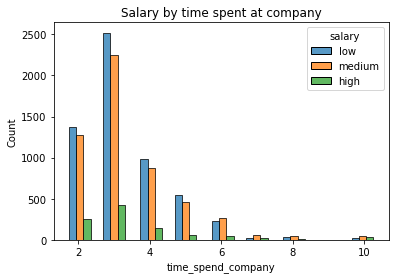

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

plot = sns.histplot(
    x = df1['time_spend_company'],
    hue = df1['salary'],
    multiple = 'dodge',
    shrink = 7
)
plot.set_title('Salary by time spent at company')

plt.show()

From this plot, we can see that most employees are making a low or high salary. For those working in the company 2-5 years, most of them make a low salary. For those working at the company 6+ years, most of them make a medium salary.

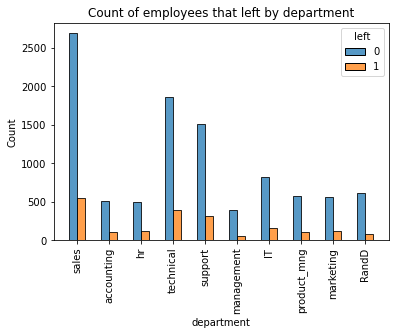

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plot = sns.histplot(
    x = df1['department'],
    hue = df1['left'],
    multiple = 'dodge',
    shrink = .5
)
plot.set_title('Count of employees that left by department')
plt.xticks(rotation = 90)
plt.show()

There doesn't seem to be significant differences in employees leaving in different departments. Sales has the most employees represented in the data.

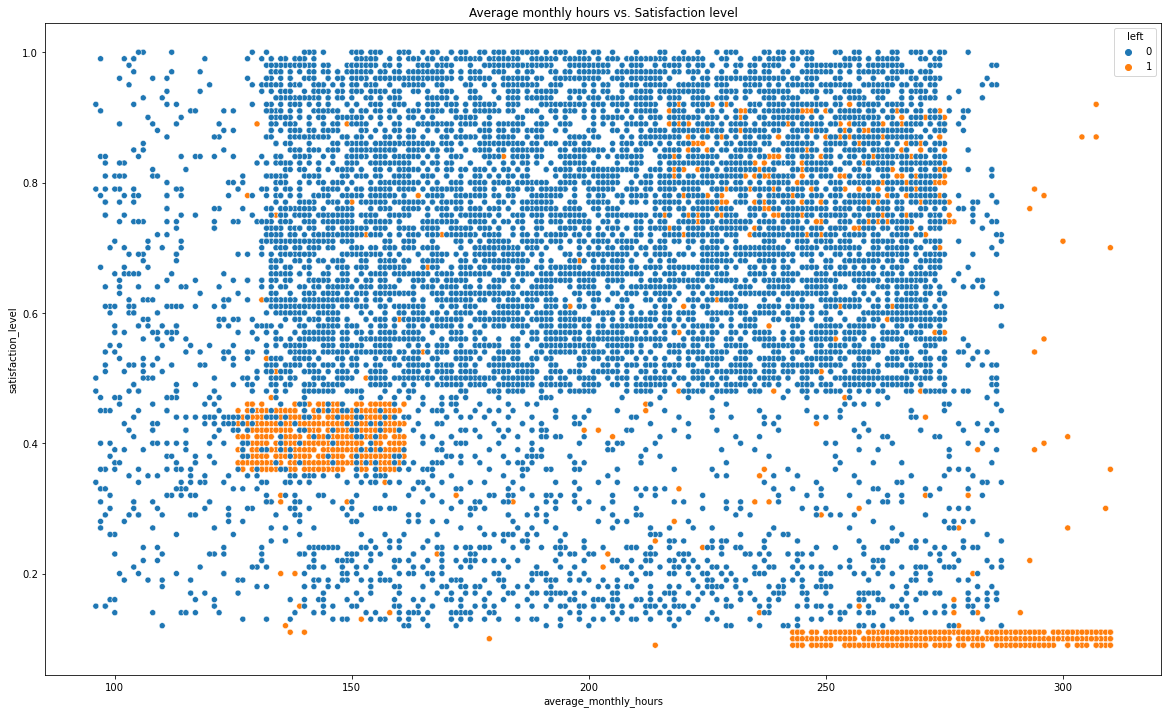

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(20,12))
plot = sns.scatterplot(
    x = df1['average_monthly_hours'],
    y = df1['satisfaction_level'],
    hue = df1['left']
)
plot.set_title('Average monthly hours vs. Satisfaction level')
plt.show()

The plot above shows that satisfaction levels for employees that left were low for those who had less average monthly hours and for those that have the most monthly hours, the satisfaction was even less.

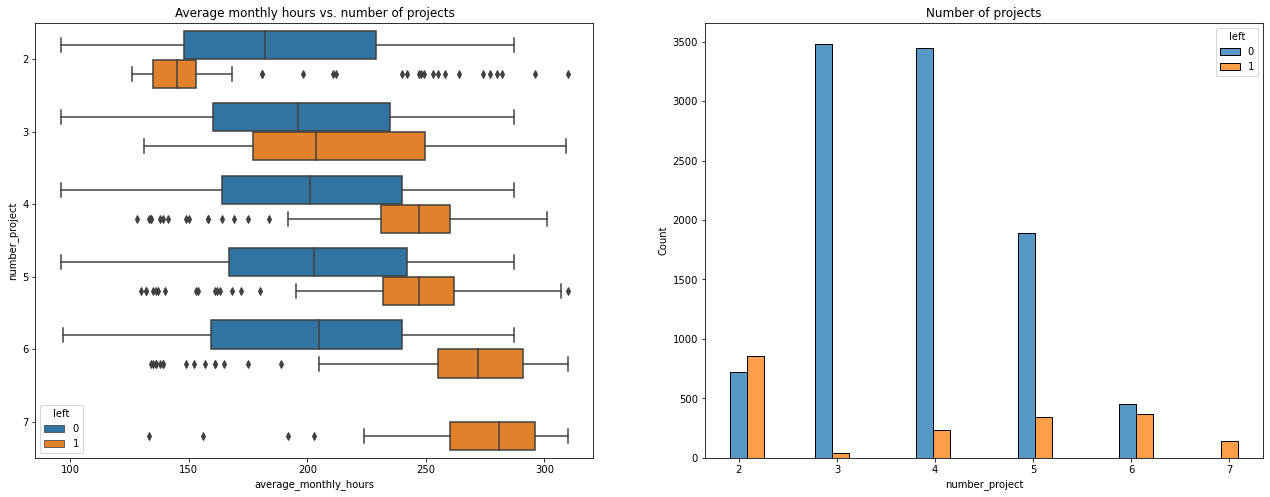

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(
    x = df1['average_monthly_hours'],
    y = df1['number_project'],
    hue = df1['left'],
    orient = 'h',
    ax = ax[0]
)
ax[0].set_title('Average monthly hours vs. number of projects')

sns.histplot(
    x = df1['number_project'],
    hue = df1['left'],
    multiple = 'dodge',
    shrink = 2,
    ax = ax[1]
)
ax[1].set_title('Number of projects')

plt.show()

From this, we can see that employees who had 6+ projects all left the company and they are also the employees who seem to have had the most average monthly hours.

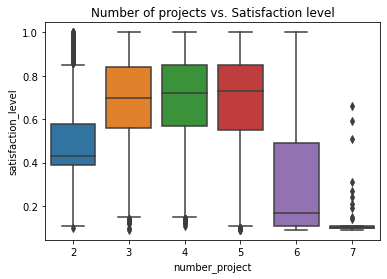

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plot = sns.boxplot(
    x = df1['number_project'],
    y = df1['satisfaction_level']
)
plot.set_title('Number of projects vs. Satisfaction level')
plt.show()

This indicates that the employees with 6+ projects typically had very low satisfaction levels, while those with a medium amount of projects (3-5) has highest satisfaction levels.

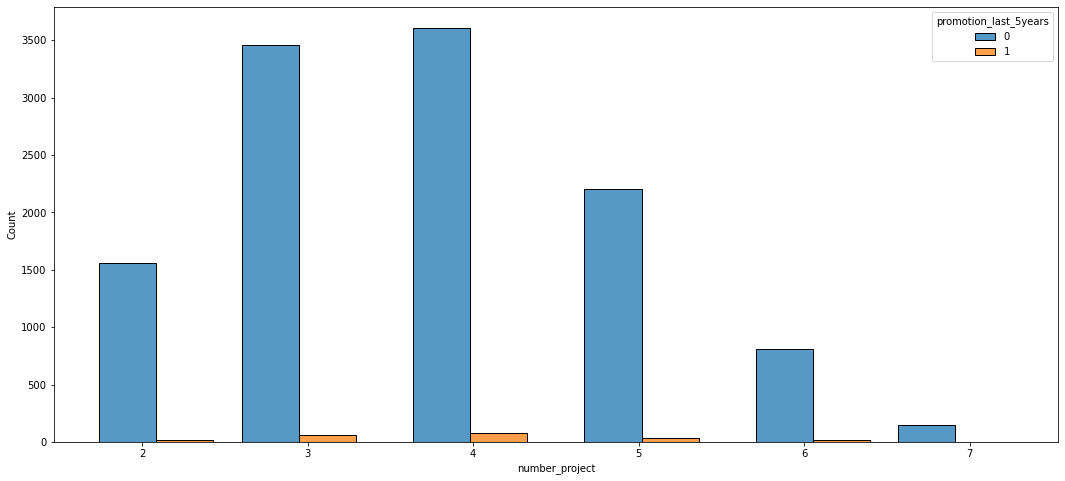

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(18,8))
plot = sns.histplot(
    x = df1['number_project'],
    hue = df1['promotion_last_5years'],
    multiple = 'dodge',
    shrink = 4
)
plt.show()

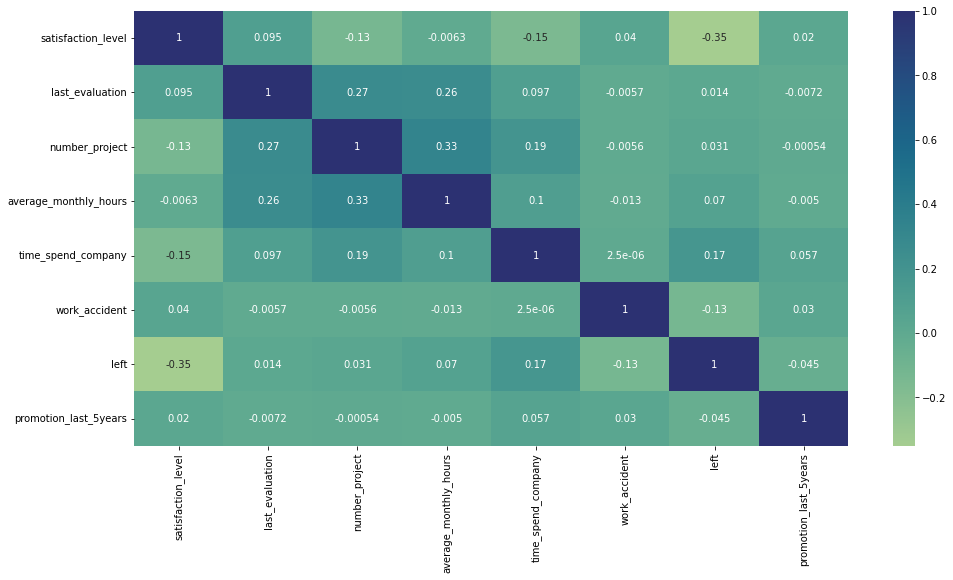

In [25]:
df1.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(df1.corr(), annot = True, cmap = 'crest')

The heatmap of correlation shows that average monthly hours, number of project, and evaluation score (last evaluation) have a positive correlation. Satisfaction level and whether an employee left have a negative correlation.

### Insights

There seems to be poor management with some projects. Some employees are taking on too many projects/working too many average hours per month compared to others and these employees seem to be the least satisfied and the ones who end up leaving the company. Not many employees are promoted within 5 years and the salaries that most employees make are low or medium, which makes sense that they'd be unsatisfied with the work they have to do when they aren't getting what they should in return. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. What was odd was the high metric scores when evaluating the data, which seemed to indicate overfitting or data leakage.
2. Independent variables chosen in the final model were last_evaluation, number_project, time_spend_company, work_accident, promotion_last_5years, department, and salary because these variables seemed most suitable for prediction, while satisfaction and average_monthly_hours were not used because of the possibility of data leakage.
3. Assumptions were met
4. The random forest model seems to fit the data well. The accuracy was around  95% and the F1 score around 85%.
5. The model could be improved; I would look more into engineering new features based on the existing ones and using a boosting method to see if that gives an improved model. It might also be beneficial to have more data.
6. Resources used were same as previous steps.
7. Ethical considerations

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a binary classification task because the employee could've either left (left = 1) or stayed (left = 0). 

### Identify the types of models most appropriate for this task.

* Binomial logistic regression - technique that models probability of an observation falling into one of two categories, based on one or more independent variables
* Decision tree - supervised classification model that represent various solutions available to a given problem based on the possible outcomes of related choices
* Random forest - ensemble of Decision Trees
* Gradient boosting (XGBoost) model - boosting methodology where each base learner in sequence is built to predict residual errors of model that preceded it

I will be using Binomial logistic regression and Random forest.

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Logistic Regression ####

In [26]:
### YOUR CODE HERE ###
df_logistic = df1.copy()

#Convert salary to numerical using label encoding because there is a ranking to the salary
##Cast the column as categorical and set the categories
df_logistic['salary'] = df_logistic['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

#Convert department to numerical using one-hot encoding because the variables have no particular order
df_logistic = pd.get_dummies(df_logistic, columns=['department'], drop_first = False)
df_logistic.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Check multicollinearity
* From the heatmap of correlation between the variables above, we see that none of the variables have a high correlation with each other.

Check and remove outliers
* We saw from describe() and from the box plot above that time_spend_company has some outliers that need to be removed.

In [27]:
mask = ((df1['time_spend_company'] >= lower_limit) & (df1['time_spend_company'] <= upper_limit))
df_logistic = df_logistic[mask]

In [28]:
#Get the dependent and independent variables as X and y variables
y = df_logistic['left']
X = df_logistic.drop('left', axis = 1)

#Get training and testing set; stratify y because of class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [29]:
#Fit model to the data
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

#Get coefficients
coef = clf.coef_
intercept = clf.intercept_
print('coefficient:', coef, 'intercept:', intercept)

#Save predictions
y_pred = clf.predict(X_test)

coefficient: [[-4.34221595e+00 -1.15444697e-02 -4.86120495e-01  3.57214959e-03
   1.10422498e+00 -1.50082616e+00 -1.16290829e+00 -5.21514963e-01
  -8.04364757e-02 -3.22737318e-01 -2.86185282e-01 -2.65958307e-03
  -1.96840383e-01 -1.13398552e-01 -9.98545309e-02  3.32141266e-02
   2.17614136e-02  2.83189803e-02]] intercept: [-1.31819065]


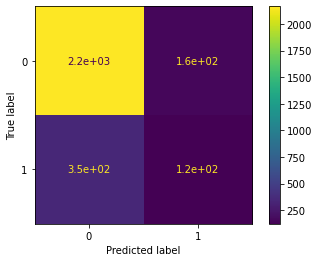

In [30]:
#Create confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

* True Negatives: An employee is predicted to not leave the company, and they don't.
* True Positives: An employee is predicted to leave the company, and they do.
* False Negatives: An employee is predicted to not leave the company, but they do.
* False Positives: An employee is predicted to leave the company, but they don't.

In [31]:
#Checking the class imbalance for the dependent variable
print(df_logistic['left'].value_counts(normalize=True))

0    0.831468
1    0.168532
Name: left, dtype: float64


In [32]:
# Calculate metrics for the model
precision = metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("accuracy: ", accuracy, "\nrecall: ", recall, "\nprecision: ", precision, "\nf1: ", f1)

target_names = ['Predicted not leave', 'Predicted leave']
print(metrics.classification_report(y_test, y_pred, target_names = target_names))

accuracy:  0.8194842406876791 
recall:  0.8194842406876791 
precision:  0.44086021505376344 
f1:  0.328
                     precision    recall  f1-score   support

Predicted not leave       0.86      0.93      0.90      2321
    Predicted leave       0.44      0.26      0.33       471

           accuracy                           0.82      2792
          macro avg       0.65      0.60      0.61      2792
       weighted avg       0.79      0.82      0.80      2792



The scores for predicting an employee not leaving are fairly high, but the scores for predicting an employee leaving are pretty low. From the confusion matrix, the model predicted True Negatives well and didn't predict True Positives well. There were a lot of False Negatives predicted as well. The class imbalance is in favor of negatives (an employee not leaving), so this is to be expected. When the model makes an error, it is more likely to predict a False Negative than a False Positive.

#### Random Forest Model####

In [33]:
df_rf = df1.copy()

#Convert salary to numerical using label encoding because there is a ranking to the salary
##Cast the column as categorical and set the categories
df_rf['salary'] = df_rf['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

#Convert department to numerical using one-hot encoding because the variables have no particular order
df_rf = pd.get_dummies(df_rf, columns=['department'], drop_first = False)
df_rf.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
y = df_rf['left']
X = df_rf.drop('left', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [35]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2534
           1       0.92      0.99      0.96       464

    accuracy                           0.99      2998
   macro avg       0.96      0.99      0.97      2998
weighted avg       0.99      0.99      0.99      2998



In [36]:
def write_pickle(file_name, model):
    with open(file_name + '.pickle', 'wb') as to_write:
        pickle.dump(model, to_write)
        
def read_pickle(file_name):
    with open(file_name + '.pickle', 'rb') as to_read:
        return pickle.load(to_read)

In [37]:
# %%time
# rf = RandomForestClassifier(random_state = 42)

# cv_params = {
#     'n_estimators': [50, 200, 500, 600],
#     'max_features': [1.0, 'sqrt', 'log2', None],
#     'max_depth': [3, 5, 7, 8, None],
#     'min_samples_split': [2, 3, 5],
#     'min_samples_leaf': [1, 3]
# }

# scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = 'roc_auc')

# rf_cv.fit(X_train, y_train)

In [38]:
rf_cv = read_pickle('rf_cv1')

In [39]:
rf_cv.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [40]:
rf_cv.best_score_

0.9818790120685656

In [41]:
# write_pickle('rf_cv1', rf_cv)

In [42]:
rf_opt = RandomForestClassifier(max_depth = 8, max_features = 'sqrt', n_estimators = 50, 
                                min_samples_leaf = 1, min_samples_split = 2, random_state = 42)
rf_opt.fit(X_train, y_train)
y_pred = rf_opt.predict(X_test)
print(metrics.classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2534
           1       0.92      0.98      0.95       464

    accuracy                           0.98      2998
   macro avg       0.96      0.98      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [43]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = metrics.roc_auc_score(y_test_data, preds)
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [44]:
get_scores('Random forest test 1', rf_cv, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,Random forest test 1,0.984914,0.917671,0.950104,0.983989,0.957435


Based on the metrics for the Random Forest, it has a high score for all the metrics, especially Precision. This indicates that the model predicts True Positives well. The metrics are suspiciously high though, which could be a result overfitting due to data leakage (when your predictors include data that won't be available at the time you make predictions). In this case, the data leakage could come from average monthly hours worked because the hours worked could've been affected by whether an employee has left or not. For example, if they were already determined to be leaving the company, their hours could be less. It could also come from satisfaction_level because an employee who has left/is leaving is likely to be unsatisfied. To prevent this data leakage, variables updated after the dependent variable (left) is made should be excluded.

#### Random Forest with Feature Engineering ####

Compare hours and satisfaction for those who have left vs. those who haven't

In [45]:
print(df1[df1['left'] == 0]['average_monthly_hours'].describe())
print(df1[df1['left'] == 1]['average_monthly_hours'].describe())

count    10000.000000
mean       198.942700
std         45.665507
min         96.000000
25%        162.000000
50%        198.000000
75%        238.000000
max        287.000000
Name: average_monthly_hours, dtype: float64
count    1991.000000
mean      208.162230
std        61.295145
min       126.000000
25%       146.000000
50%       226.000000
75%       262.500000
max       310.000000
Name: average_monthly_hours, dtype: float64


In [46]:
print(df1[df1['left'] == 0]['satisfaction_level'].mean())
print(df1[df1['left'] == 1]['satisfaction_level'].mean())

0.6673649999999947
0.4402712204922172


Drop average monthly hours and satisfaction level columns. (another way to handle it could be to create a new column based off average monthly hours that would indicate whether an employee is overworked)

In [47]:
df2 = df_rf.drop(columns=['satisfaction_level', 'average_monthly_hours'], axis = 1)

In [48]:
y = df2['left']
X = df2.drop('left', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [49]:
# %%time

# rf2 = RandomForestClassifier(random_state = 42)

# cv_params = {
#     'n_estimators': [50, 200, 500, 600],
#     'max_features': [1.0, 'sqrt', 'log2', None],
#     'max_depth': [3, 5, 7, 8, None],
#     'min_samples_split': [2, 3, 5],
#     'min_samples_leaf': [1, 3]
# }

# scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# rf_cv2 = GridSearchCV(rf2, cv_params, scoring = scoring, cv = 5, refit = 'roc_auc')

# rf_cv2.fit(X_train, y_train)

In [85]:
# write_pickle('rf_cv2', rf_cv2)
rf_cv2 = read_pickle('rf_cv2')

In [86]:
rf_cv2.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [87]:
rf_cv2.best_score_

0.9691160198424278

In [53]:
get_scores('Random forest test 2', rf_cv2, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,Random forest test 2,0.906818,0.801205,0.850746,0.953302,0.892402


The metric scores are lower, but is likely to do better than a model with data leaks when used on new, unseen data.

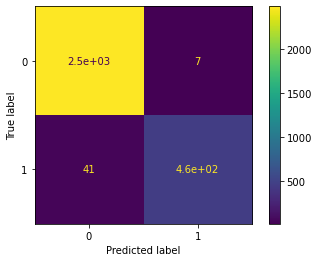

In [54]:
#Create confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

Based on the confusion matrix above, the model predicted mostly True Negatives and True Positives. For false predictions, it mainly predicted False Negatives. The class imbalance is in favor of negatives (an employee staying), so these results are to be expected.

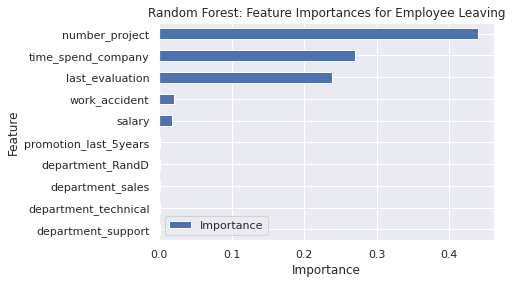

In [94]:
# Get feature importances
importances = rf_cv2.best_estimator_.feature_importances_

# Get indices of top 10 features
indices = np.argsort(importances)[-10:]

# Get column labels of top 10 features 
names = [X.columns[i] for i in indices]

# Filter `importances` to consist of top 10 feature importances
importances = importances[indices]

# Barplot: Add bars
sns.set(font_scale=1)
y_df = pd.DataFrame({"Feature":names,"Importance":importances})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [55]:
#Evaluate metrics for Random Forest model
get_scores('Random forest test 2', rf_cv2, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,Random forest test 2,0.906818,0.801205,0.850746,0.953302,0.892402


In [57]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2534
           1       0.92      0.98      0.95       464

    accuracy                           0.98      2998
   macro avg       0.96      0.98      0.97      2998
weighted avg       0.98      0.98      0.98      2998



1. **Accuracy**: Around 95% of the data were correctly categorized.

2. **Precison**: Around 90.07% of positive predictions were true positives. Out of all the employees the model predicted would leave the company, 92% actually did (from the classification report).

3. **Recall**: Around 80.12% of the proportion of positives were identified correctly. Out of all the employees that actually left the company, the model predicted this outcome correctly for 98% of those employees.

4. **F1**: The F1 score is 0.85 and the F1 score for Positive predictions is 0.95. These values are both relatively close to 1, which indicates the model did a pretty good job of predicting whether or not an employee will leave the company. 

5. **AUC**: The ROC AUC score is around 0.89, which is relatively close to 1. This indicates that the model does well in distinguishing between positive and negative classes.

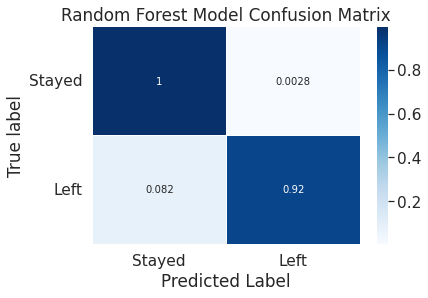

In [82]:
# Confusion matrix with normalized values for percentages

# Get and reshape confusion matrix data
cm = metrics.confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Build the plot
sns.set(font_scale=1.4)
sns.heatmap(cm, annot = True, annot_kws = {'size': 10},
            cmap = "Blues", linewidths = 0.2)

# Add labels to plot
class_names = ['Stayed', 'Left']
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks, class_names, rotation = 0)
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.title('Random Forest Model Confusion Matrix')

plt.show()

This confusion matrix is a normalized version of the one in the previous step. We can see that the model correctly predicts many True Negatives and True Positives.

### Summary of model results

The random forest model outperformed the logistic regression model for predicting whether an employee will leave. The random forest model has fairly high accuracy, precision, recall, f1, and roc auc scores and as seen from the confusion matrix, it correctly predicted many true negatives and true positives.

### Conclusion, Recommendations, Next Steps

The Random Forest Model performed the best at predicting whether an employee will leave the company. This was based on variables including their department, last evaluation score, number of projects, time spent at company, promotion within last 5 years, and salary. Based on the analysis and the model, the data indicates that employees leave due to being overworked and not compensated enough for this, leading to them being unsatisfied. Some recommendations to increase employee retention are:
* Giving employees an amount of work and projects that they can handle. The company can have managers do checks with employees to see if they are feeling overworked or underworked. It seems employees are unsatisfied when they have too little or too much to handle.
* Find out why employees at the 2-4 year marks are unsatisfied. This could be because of low pay and lack of promotions even after years spent at the company.
* Employees that left the company didn't differ much by department. If changes are implemented, it should be implemented company-wide.
* Reevaluate how evaluation scores are made because it may affect employee morale if employees are expected to work 200+ hours to have high evaluation scores.
* Many employees in the dataset are working more than a typical average amount of hours should be for a month, so this could be something that managers discuss with their teams and check in with employees on more frequently.

Next steps:
* It could be valuable to have an anonymous survey that employees could fill out on what they think the company could improve on and what they currently like about the company. These insights could be used to further analyze employee satisfaction.
* Employee satisfaction, as expected, seems to be closely tied to an employee leaving. It could be helpful to further analyze employee satisfaction and predict whether an employee is satisfied.